In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
df.shape

(1258, 6)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [9]:
data=df.loc[:,["Open"]].values
data.shape

(1258, 1)

In [10]:
scaled_data = scaler.fit_transform(data)

In [11]:
training_size = int(len(scaled_data)*0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size:]


In [13]:
train_data.shape

(1006, 1)

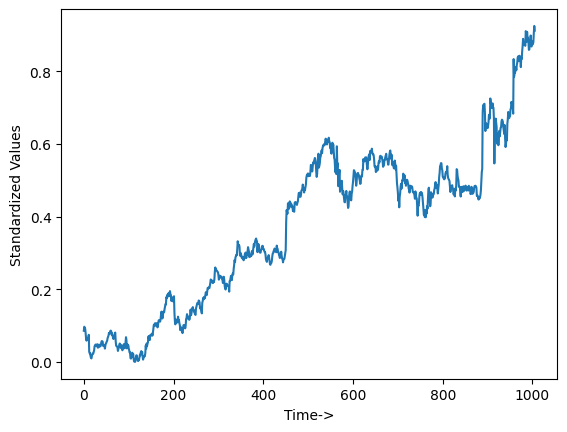

In [12]:
plt.plot(train_data)
plt.ylabel("Standardized Values")
plt.xlabel("Time->")
plt.show()

### Create data structure to train model  
Taking reference of past 60 days to predict future stock price  
x_train will have data of 60 days prior to current date and y_train will have price on current date

In [14]:
x_train = []
y_train = []
time = 60
for i in range(60,train_data.shape[0]):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
x_train.shape,y_train.shape

((946, 60), (946,))

In [16]:
x_train = np.reshape(x_train,newshape=(946,60,1))
x_train.shape

(946, 60, 1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Dropout

In [18]:
model = Sequential()

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation = "tanh", return_sequences = True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,801 (69.54 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(x_train,y_train,epochs=50,batch_size=30,validation_split=0.05)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.5080 - val_loss: 0.0320
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.2691 - val_loss: 0.1847
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.2334 - val_loss: 0.0030
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1928 - val_loss: 0.0201
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.1128 - val_loss: 0.0313
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0956 - val_loss: 0.0103
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0816 - val_loss: 0.0075
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0774 - val_loss: 6.2101e-04
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0640 - val_loss: 0.0017
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0500 - val_loss: 0.0041
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0396 - val_loss: 5.9077e-04
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - 

In [20]:
x_test = []
y_test = []
time = 60
for i in range(60,test_data.shape[0]):
    x_test.append(test_data[i-60:i,0])
    y_test.append(test_data[i,0])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [21]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)



MAE:  66.21767705281576
MSE:  4742.537962502268
RMSE:  68.8660871728768


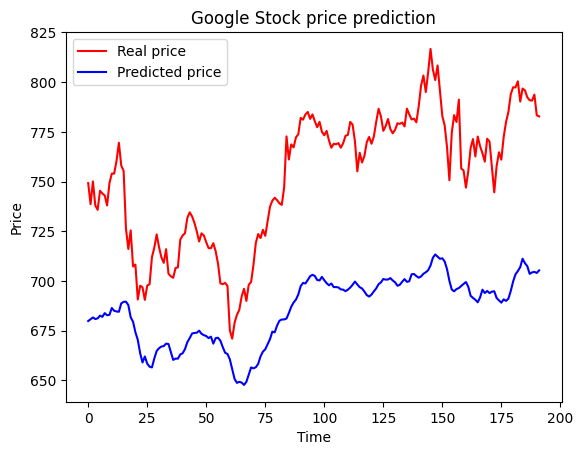

In [23]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_pred, color = 'blue', label = 'Predicted price')

plt.title('Google Stock price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
print(y_test[0],y_pred[0])

[749.25] [679.8536]
